In [38]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [40]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [41]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']
X,y

(     age  sex   BP  cholestrol
 0     70    1  130         322
 1     67    0  115         564
 2     57    1  124         261
 3     64    1  128         263
 4     74    0  120         269
 ..   ...  ...  ...         ...
 265   52    1  172         199
 266   44    1  120         263
 267   56    0  140         294
 268   57    1  140         192
 269   67    1  160         286
 
 [270 rows x 4 columns],
 0      1
 1      0
 2      1
 3      0
 4      0
       ..
 265    0
 266    0
 267    0
 268    0
 269    1
 Name: heart disease, Length: 270, dtype: int64)

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 4), (81, 4), (189,), (81,))

In [43]:
# Building the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
from IPython.display import Image 
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

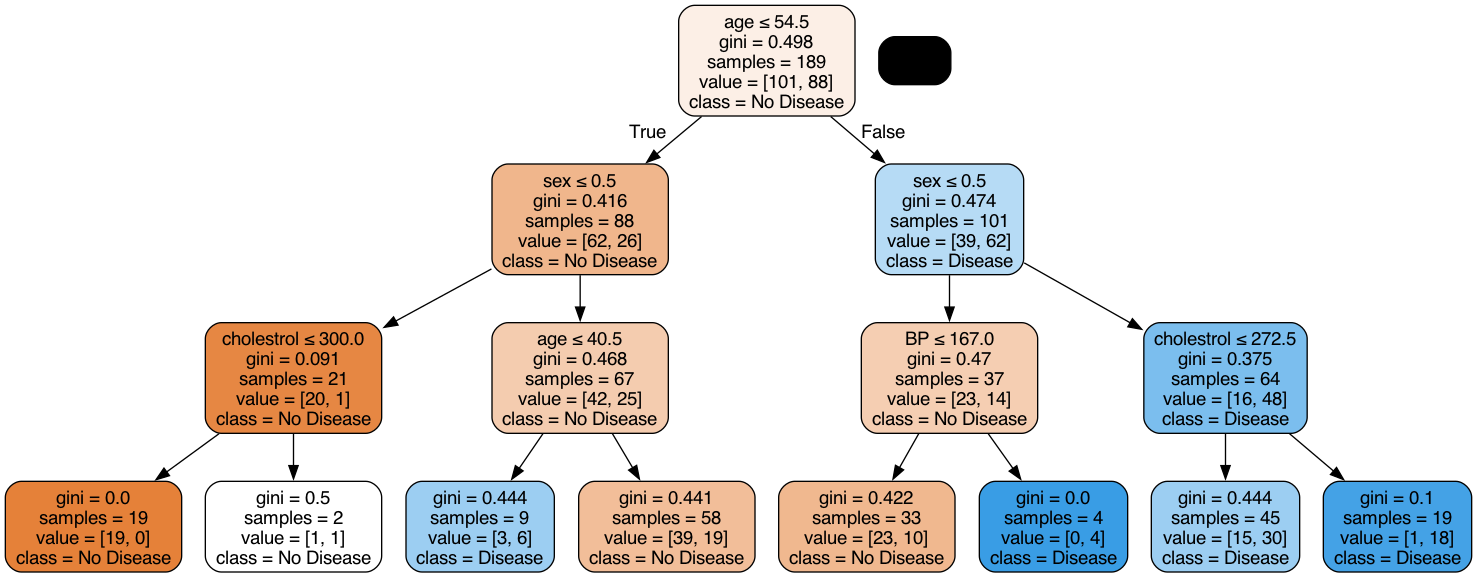

In [46]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=['No Disease','Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [47]:
# Evaluating the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.7407407407407407, 0.6049382716049383)

In [49]:
confusion_matrix(y_train, y_train_pred), confusion_matrix(y_test, y_test_pred)  

(array([[82, 19],
        [30, 58]]),
 array([[35, 14],
        [18, 14]]))

Create helper functions to evaluate the model performance and create the graph for DT

In [50]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, 
                    special_characters=True, feature_names=X.columns, class_names=['No Disease','Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [51]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("\nTrain Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("\nTest Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))

In [52]:
evaluate_model(dt)

Train Accuracy:  0.7407407407407407
Test Accuracy:  0.6049382716049383

Train Confusion Matrix
[[82 19]
 [30 58]]

Test Confusion Matrix
[[35 14]
 [18 14]]


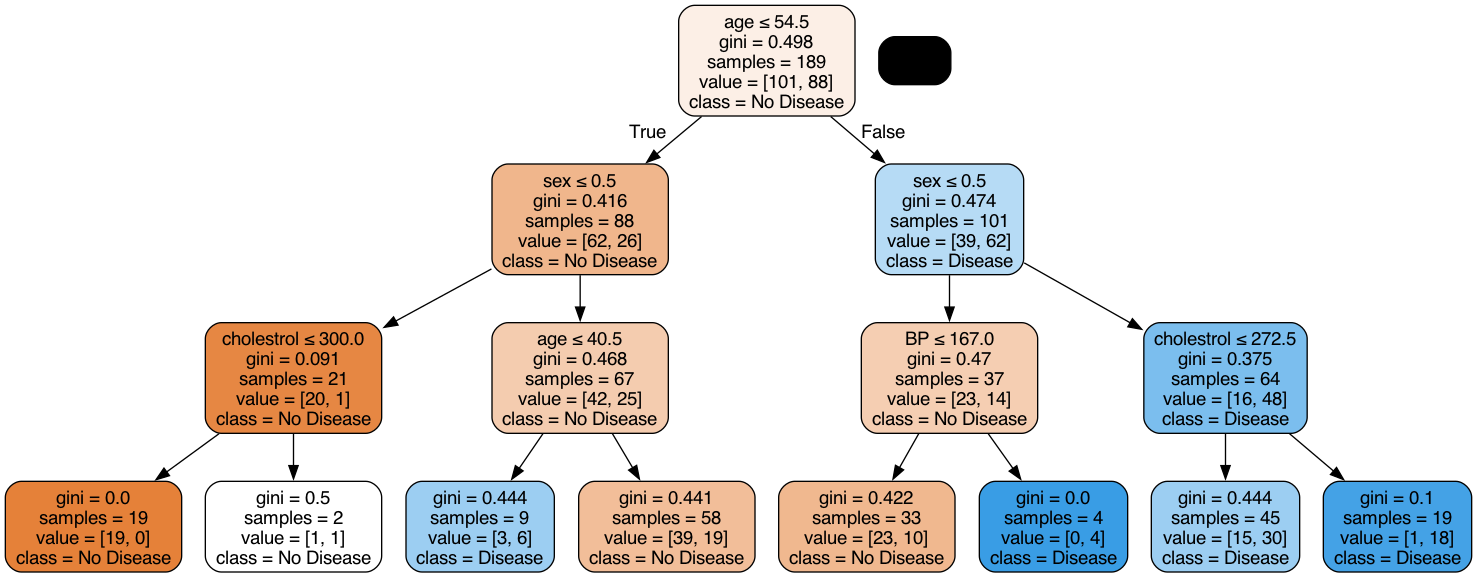

In [53]:
grph = get_dt_graph(dt)
Image(grph.create_png())

Decision tree without any hyper-parameter tuning

In [54]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

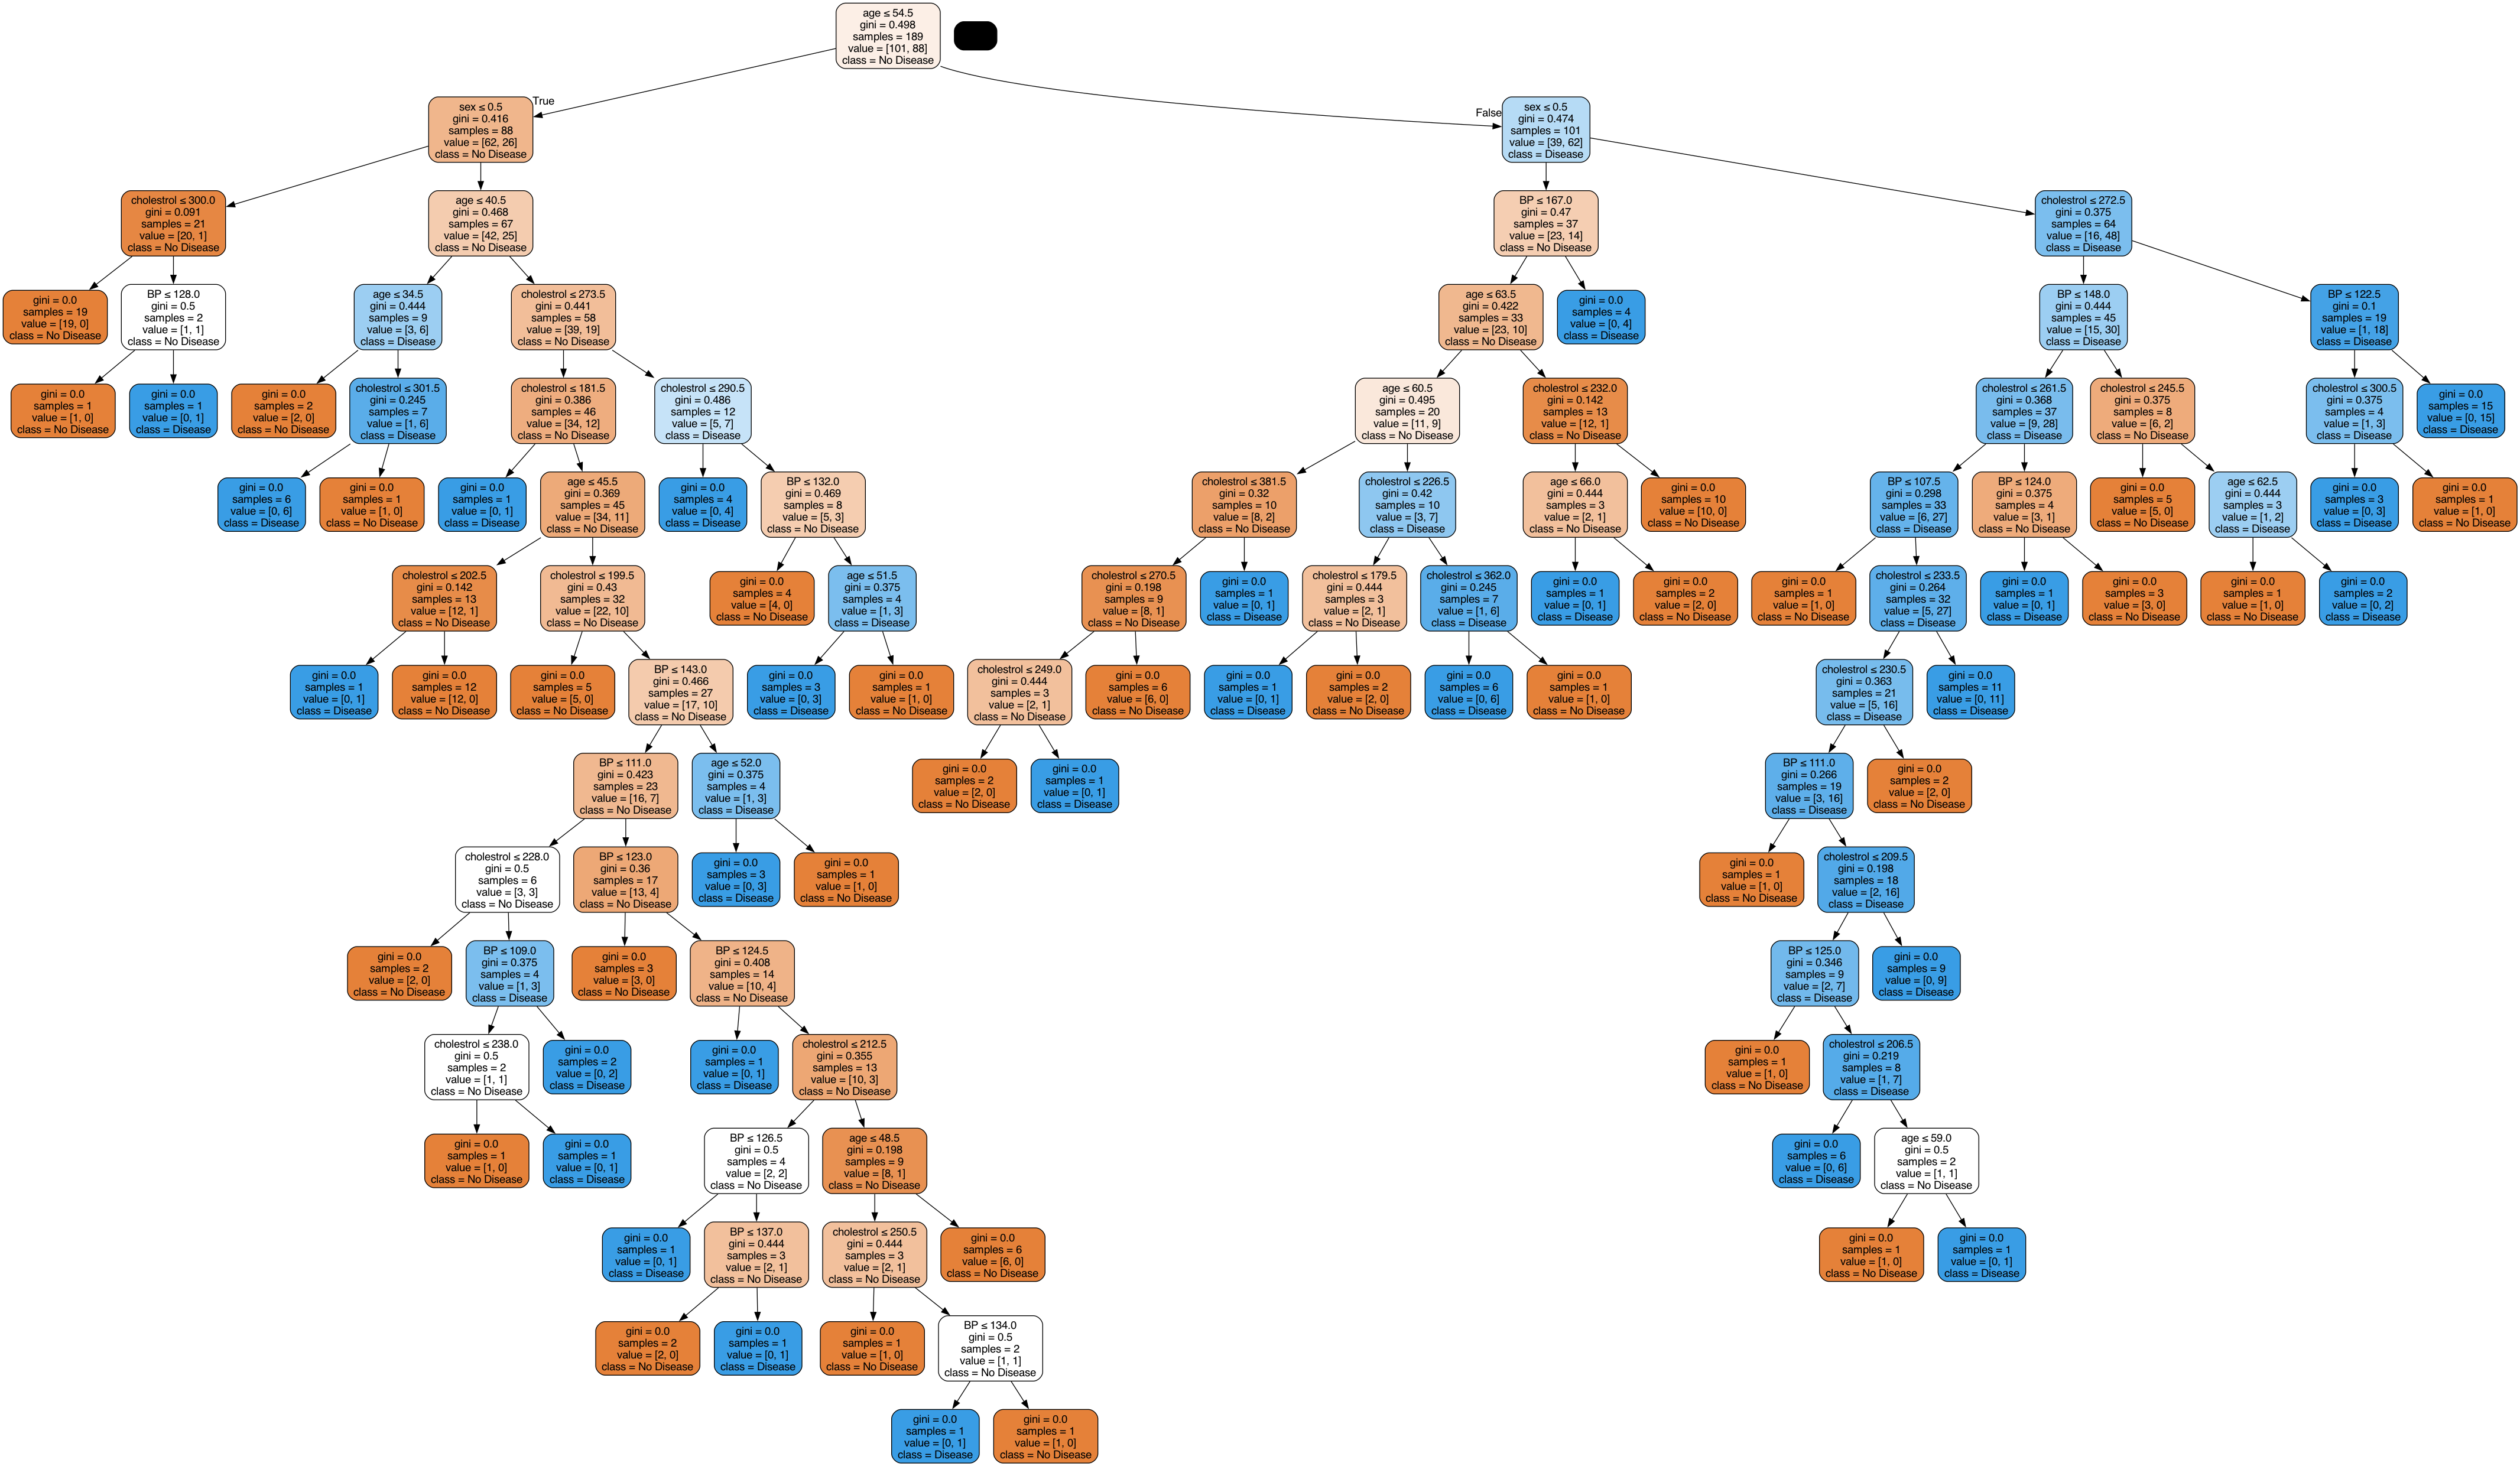

In [55]:
grph = get_dt_graph(dt_default)
Image(grph.create_png())

In [56]:
evaluate_model(dt_default)

Train Accuracy:  1.0
Test Accuracy:  0.6296296296296297

Train Confusion Matrix
[[101   0]
 [  0  88]]

Test Confusion Matrix
[[31 18]
 [12 20]]


We see that it is massively overfitting the train data

Controlling the depth of the tree

In [57]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

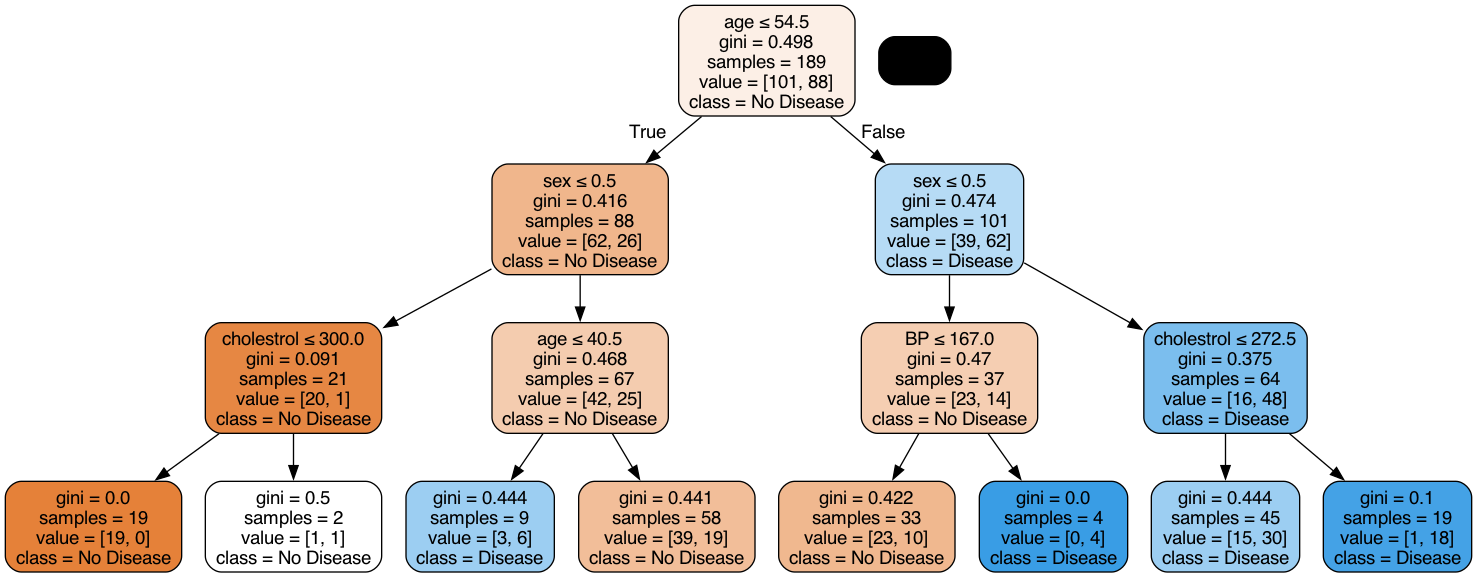

In [58]:
grph_depth = get_dt_graph(dt_depth)
Image(grph_depth.create_png())


In [59]:
evaluate_model(dt_depth)

Train Accuracy:  0.7407407407407407
Test Accuracy:  0.6049382716049383

Train Confusion Matrix
[[82 19]
 [30 58]]

Test Confusion Matrix
[[35 14]
 [18 14]]


We observe how the train accuracy and test accuracy drop. So may be not the right hyperparamter to tune

Specifying the min samples before split


In [60]:
dt_min_samples_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_samples_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

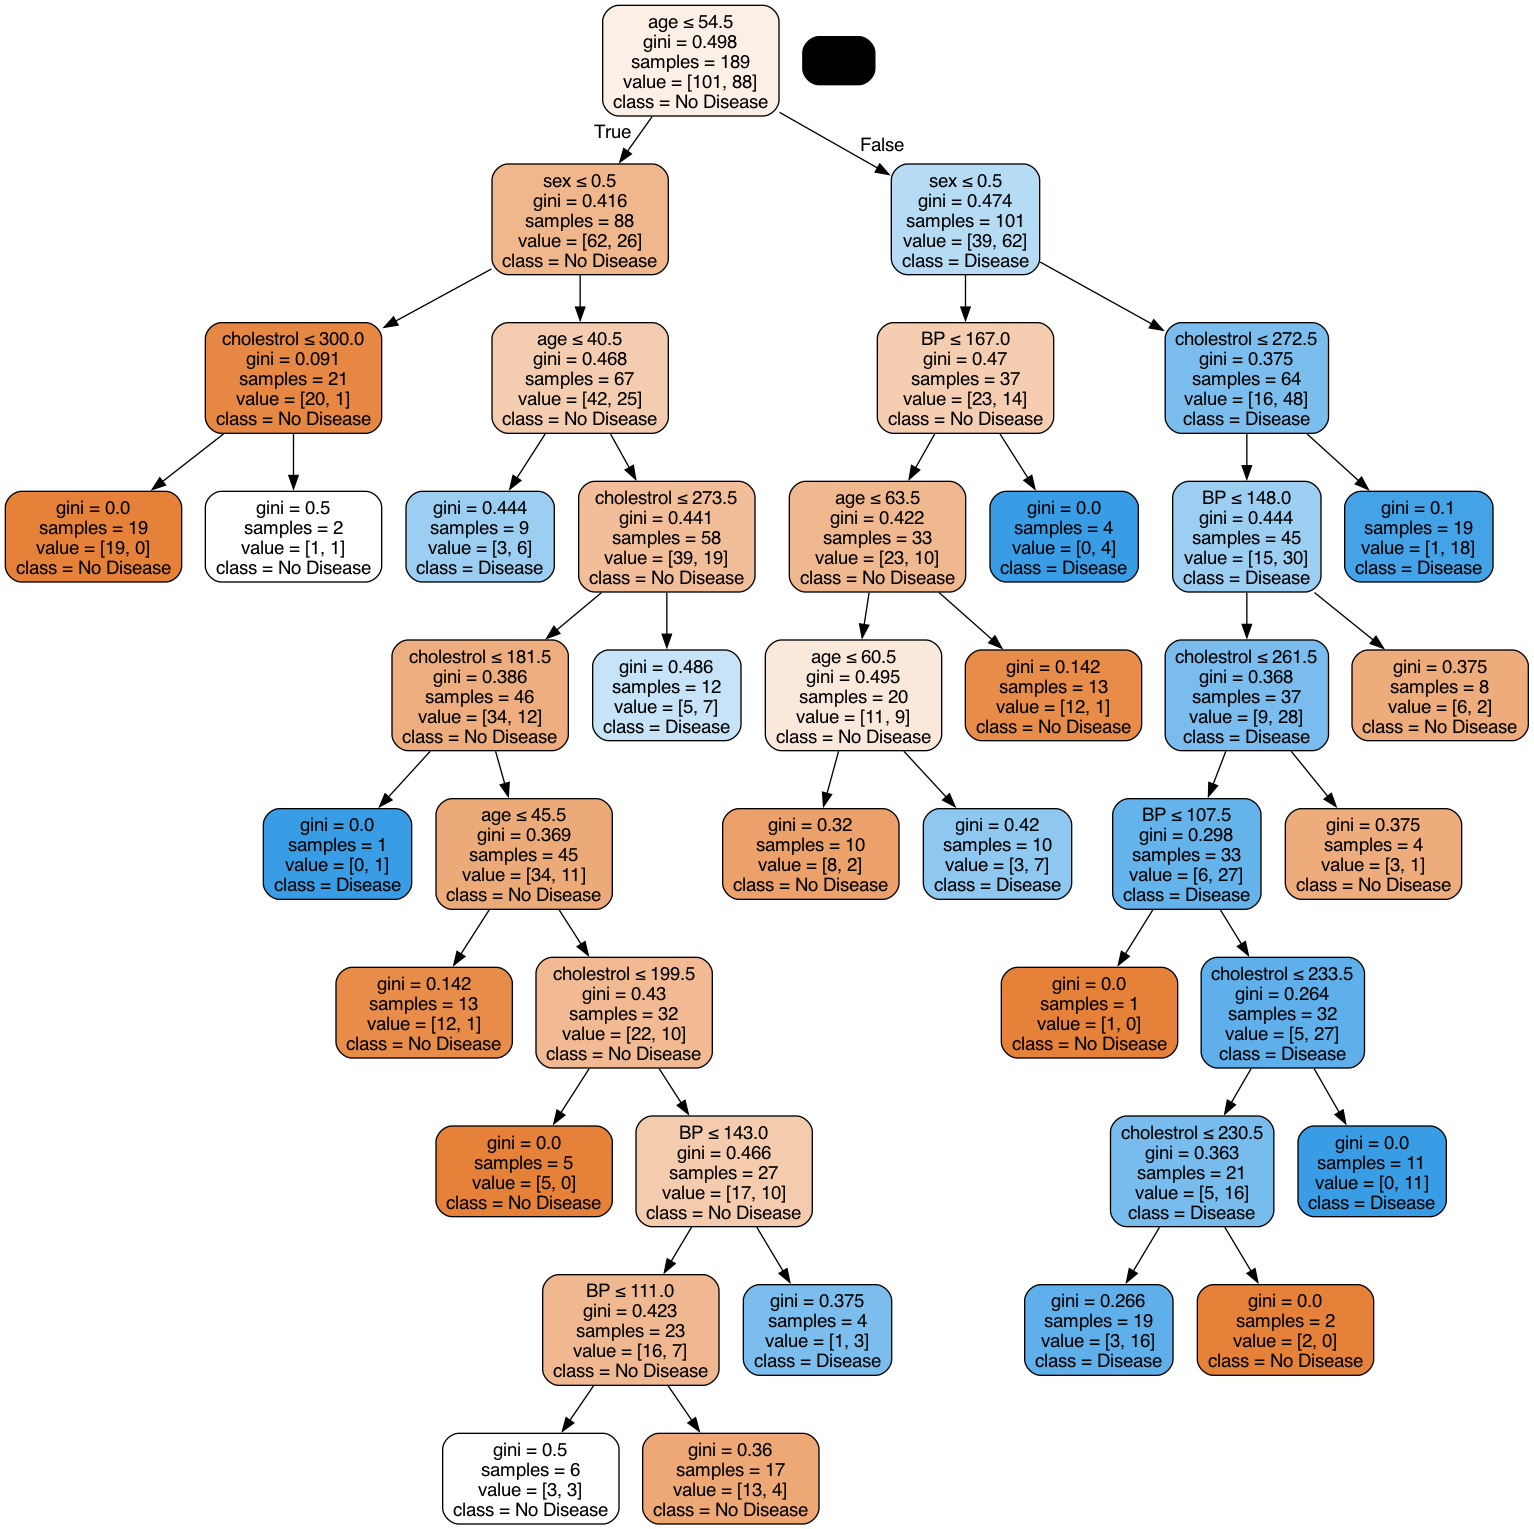

In [61]:
grph_min_samples_split = get_dt_graph(dt_min_samples_split)
Image(grph_min_samples_split.create_png())

In [62]:
evaluate_model(dt_min_samples_split)

Train Accuracy:  0.8359788359788359
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [15 73]]

Test Confusion Matrix
[[32 17]
 [12 20]]


We don't observe a huge increase in test accuracy, and also we see that some of the leaf nodes have 1,2 data point in them

Specifying the min samples at leaf

In [63]:
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_samples_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

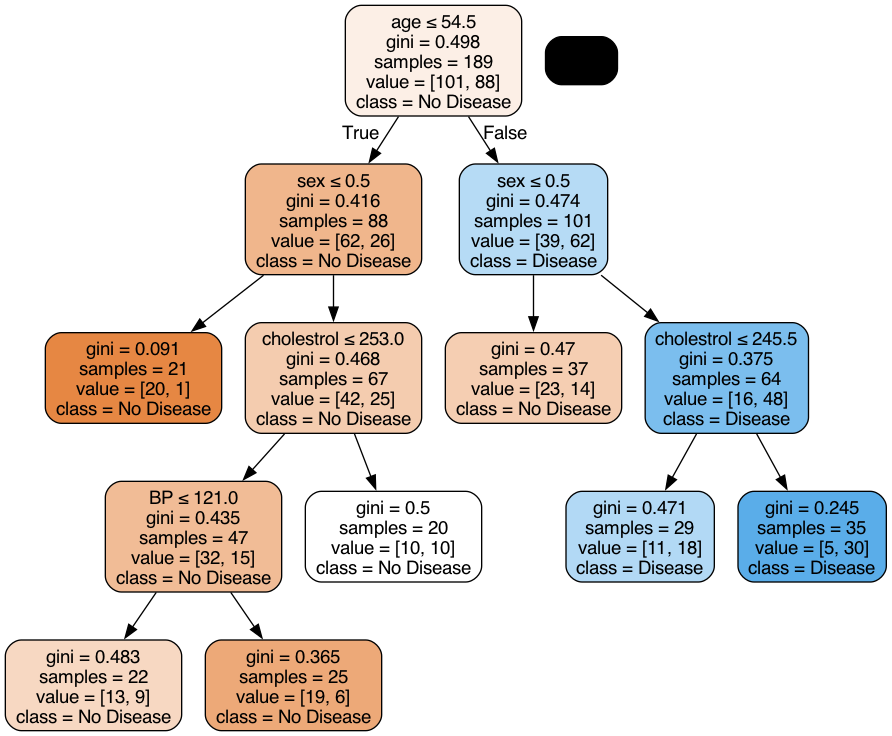

In [64]:
grph_min_samples_leaf = get_dt_graph(dt_min_samples_leaf)
Image(grph_min_samples_leaf.create_png())

In [65]:
evaluate_model(dt_min_samples_leaf)

Train Accuracy:  0.7037037037037037
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [40 48]]

Test Confusion Matrix
[[38 11]
 [18 14]]


Here is the least observed difference between train and test accuracy

Let's try using the above with Entropy instead of Gini

In [66]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

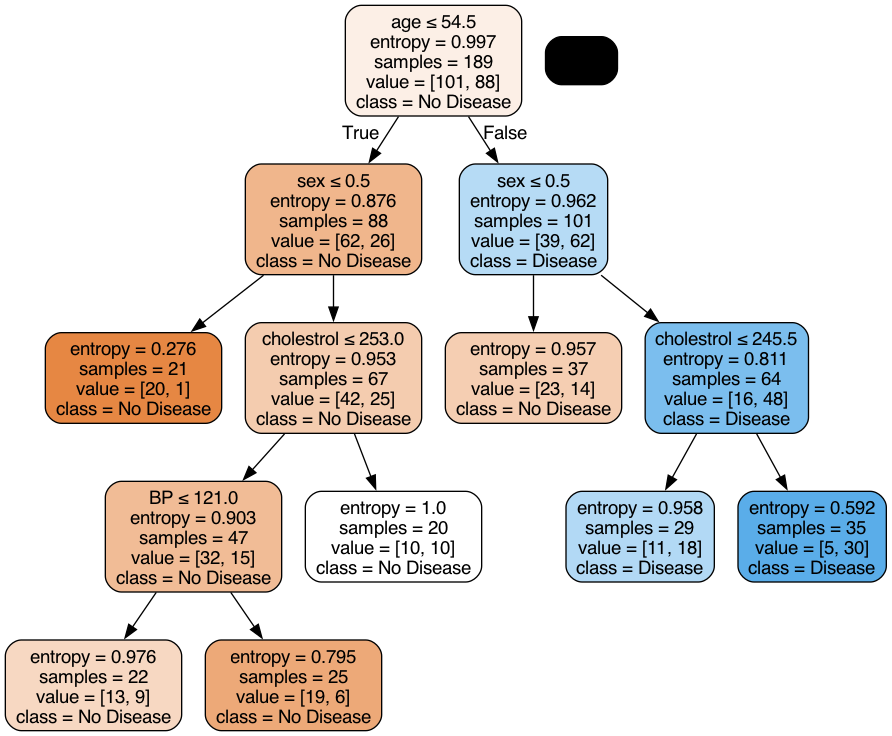

In [67]:
grph_min_leaf_entropy = get_dt_graph(dt_min_leaf_entropy)
Image(grph_min_leaf_entropy.create_png())

In [68]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy:  0.7037037037037037
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [40 48]]

Test Confusion Matrix
[[38 11]
 [18 14]]


As you can see we don't observe much difference in tree and evaluation when we use entropy over Gini

#### Hyperparameter tuning using Grid Search CV to do K-fold validation

In [69]:
dt = DecisionTreeClassifier(random_state=42)

In [70]:
from sklearn.model_selection import GridSearchCV    

In [71]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5,10,20,50,100]
}


In [72]:
grid_search = GridSearchCV(estimator=dt, 
            param_grid=params, 
            cv=5, 
            n_jobs=-1,
            verbose=1,
            scoring="accuracy")

In [73]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
CPU times: user 237 ms, sys: 73.3 ms, total: 311 ms
Wall time: 2.76 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [74]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002113,0.000828,0.001117,0.000729,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4
1,0.002778,0.001127,0.001580,0.000683,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4
2,0.001100,0.000571,0.000677,0.000522,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4
3,0.001057,0.000424,0.000576,0.000365,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4
4,0.001211,0.000825,0.000522,0.000298,gini,2,5,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.684211,0.605263,0.631579,0.675676,0.645661,0.029717,95


In [75]:
cv_results.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
175,0.000608,0.000023,0.000320,0.000004,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.684211,0.763158,0.736842,0.657895,0.675676,0.703556,0.039741,1
176,0.001545,0.000464,0.000965,0.000663,entropy,5,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.684211,0.763158,0.736842,0.657895,0.675676,0.703556,0.039741,1
177,0.000895,0.000355,0.000436,0.000204,entropy,5,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.684211,0.763158,0.736842,0.605263,0.702703,0.698435,0.053974,3
0,0.002113,0.000828,0.001117,0.000729,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4
1,0.002778,0.001127,0.001580,0.000683,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,4


In [76]:
grid_search.best_score_

0.703556187766714

In [77]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [78]:
dt_best = grid_search.best_estimator_

In [79]:
evaluate_model(dt_best)

Train Accuracy:  0.7936507936507936
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[87 14]
 [25 63]]

Test Confusion Matrix
[[35 14]
 [15 17]]


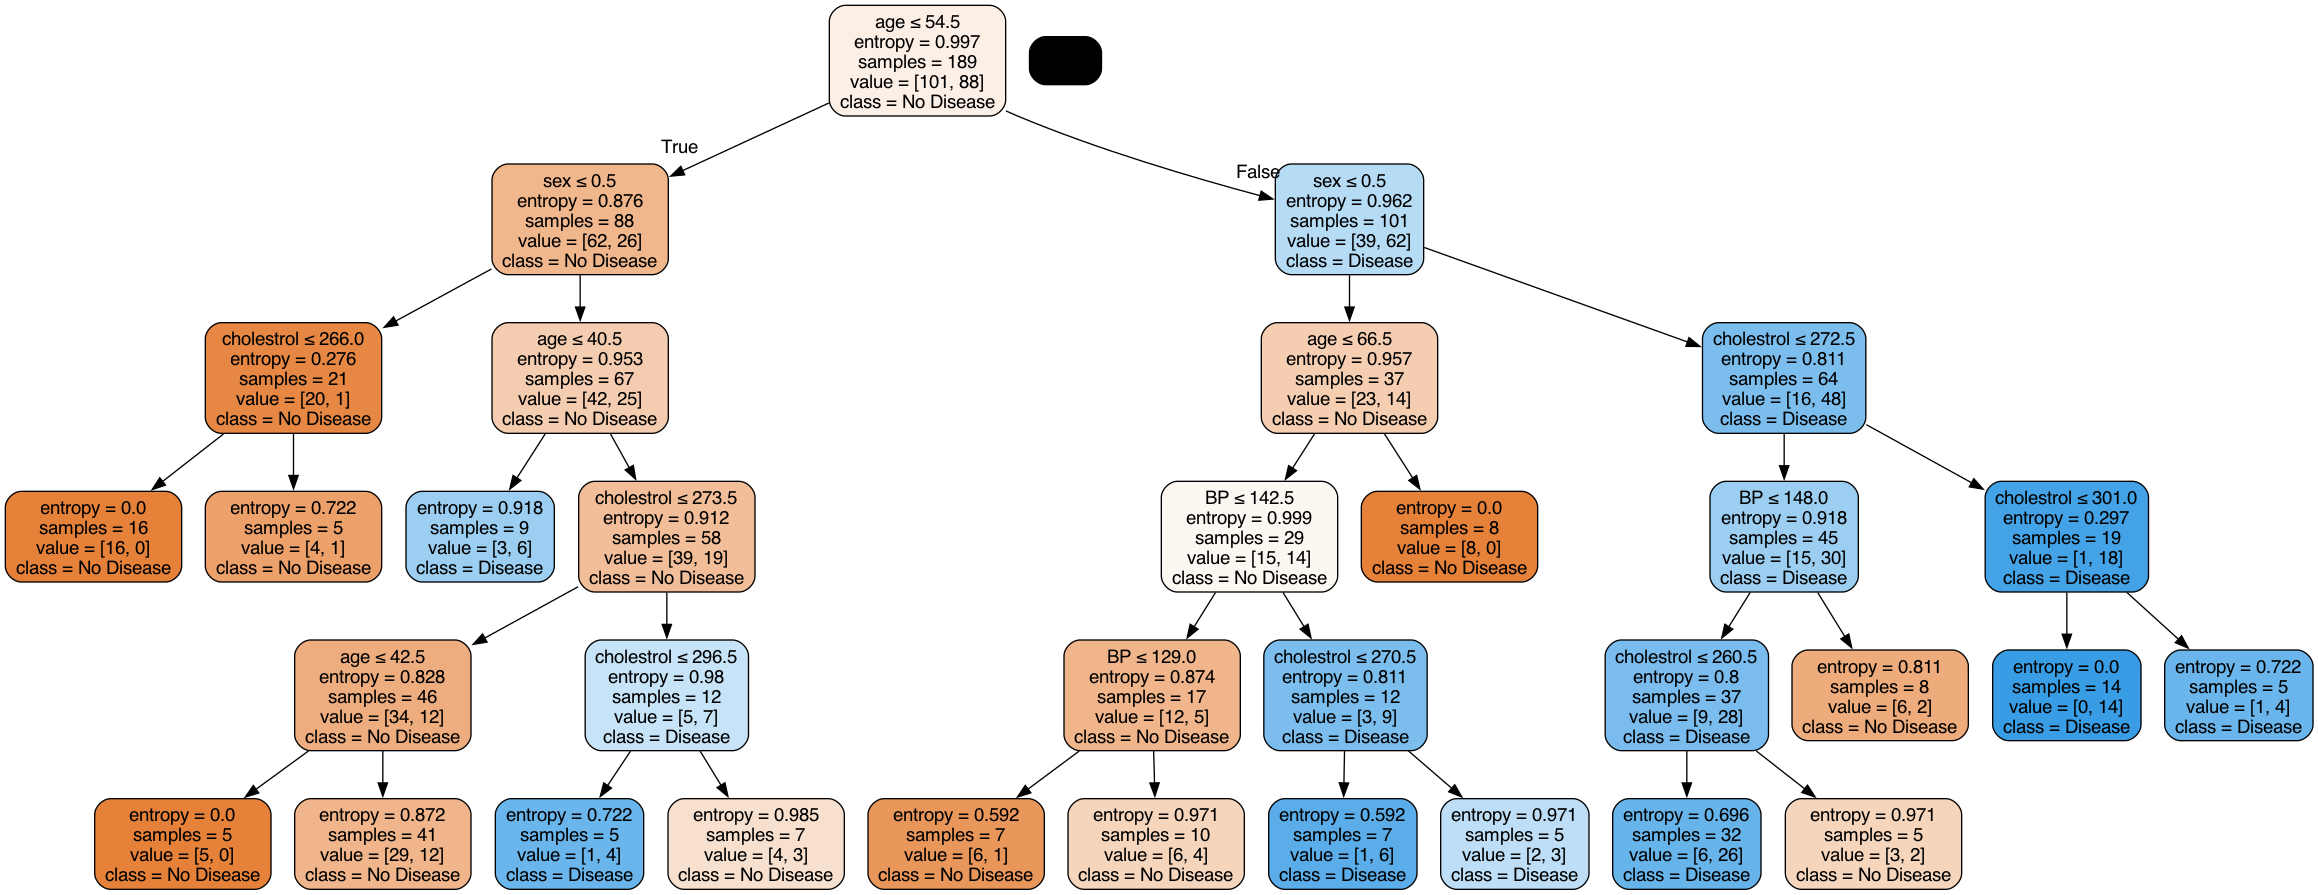

In [80]:
grph_best = get_dt_graph(dt_best)
Image(grph_best.create_png())